In [1]:
from pm4py.objects.log.obj import Trace, Event, EventLog
import pandas as pd
import pm4py

from datetime import datetime  
from datetime import timedelta 

from pm4py.algo.simulation.playout.petri_net import algorithm as simulator

# Discovering the models and simulating the simulated logs for the folds


In [2]:
def remove_nan(lists):
    newlists = []
    for tr in lists:
        newlists.append([int(x) for x in tr if str(x) != 'nan'])
    return(newlists)


def import_log(filepath):
    df = pd.read_csv(filepath)
    return(remove_nan(df.values.tolist()))

def list_to_df(nestedlist):
    time = datetime(1980, 1, 1, hour=0, minute=0, second=1, microsecond=0, tzinfo=None)
    
    flatlist =  [act for sublist in nestedlist for act in sublist]
    timelist = [time+ i * timedelta(seconds=1) for i in range(0, len(flatlist))]
    tracelist = [j for j in range(0,len(nestedlist))for i in range(0, len(nestedlist[j]))]

    df = pd.DataFrame(list(zip(tracelist , flatlist, timelist)),
                      columns =['case:concept:name', 'concept:name', 'Timestamp'])
    df['case:concept:name']= df['case:concept:name'].map(str)
    df['concept:name']= df['concept:name'].map(str)
    event_log = pm4py.convert_to_event_log(df)
    return(event_log)
    
def log_to_list(log):
    return [[a['concept:name'] for a in t] for t in log]

def save_log(loglist, filename): #save a list of lists 
    df = pd.DataFrame.from_records(loglist)
    df.to_csv(filename, index=False)

In [3]:
modellist = ['Model1', 'Model2', 'Model3','Model4', 'Model5', 'Model6']

sizes = [12000, 12800, 12800, 6400, 12600, 2700]

In [4]:
from pm4py.algo.simulation.playout.process_tree import algorithm as tree_playout



In [5]:
for m in range(0, len(modellist)):
    model = modellist[m]
    print(model)
    size = sizes[m]
    folds = [20, 15, 10, 8, 6, 5, 4, 3, 2]
    
    for fold in folds:
        print(fold)
        path = model + "/Training_Logs/Fold"+str(fold)+"/"
        path2 = "inductive_tree/"+model+"/Fold"+str(fold)+"/"
        
        for i in range(0,fold):
            csv = import_log(path+"Train"+str(i)+".csv")
            log = list_to_df(csv)
            tree = pm4py.discover_process_tree_inductive(log)
            playout_variant = tree_playout.Variants.BASIC_PLAYOUT
            param = tree_playout.Variants.BASIC_PLAYOUT.value.Parameters
            simlog = simulated_log = tree_playout.apply(tree, variant=playout_variant, parameters={param.NO_TRACES: size})
            sim_logdum = log_to_list(simlog)
            sim_log = [[int(x) for x in lst] for lst in sim_logdum]
            save_log(sim_log, path2+"Inductive_Log"+str(i)+".csv")


Model1
20
15
10
8
6
5
4
3
2
Model2
20
15
10
8
6
5
4
3
2
Model3
20
15
10
8
6
5
4
3
2
Model4
20
15
10
8
6
5
4
3
2
Model5
20
15
10
8
6
5
4
3
2
Model6
20
15
10
8
6
5
4
3
2


# Discovering models and simulating for the LOVOCV 

In [6]:
modellist = ['Model1', 'Model2', 'Model3','Model4', 'Model5', 'Model6']

sizes = [12000, 12800, 12800, 6400, 12600, 2700]

variants = [120, 128, 128, 64, 126, 27]

In [7]:
for m in range(0, len(modellist)):
    model = modellist[m]
    print("------------", model, "------------")
    size = sizes[m]
    num_variants = variants[m]
   
    for i in range(0, num_variants):
        print(i)
        path = model + "/Training_Logs/"
        path2 = "inductive_tree/"+model+"/LOVOCV/"
        csv = import_log(path+"Train"+str(i)+".csv")
        log = list_to_df(csv)
        net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(log)
        simlog = simulator.apply(net, initial_marking, variant=simulator.Variants.BASIC_PLAYOUT, parameters={simulator.Variants.BASIC_PLAYOUT.value.Parameters.NO_TRACES: size})
        sim_logdum = log_to_list(simlog)
        sim_log = [[int(x) for x in lst] for lst in sim_logdum]
        save_log(sim_log, path2+"Inductive_Log"+str(i)+".csv")


------------ Model1 ------------
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
------------ Model2 ------------
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
------------ Model3 ------------
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
4

# Evaluation

For each model, for both logs: Import log, convert to nested list, apply our metrics, report for both. 

In [8]:
import pandas as pd

import numpy as np

import math

import copy

import matplotlib.pyplot as plt

import statistics

In [9]:
def get_average_and_std(lst): 
    return(sum(lst)/len(lst), statistics.stdev(lst))

def remove_nan_and_float(lists):
    newlists = []
    for tr in lists:
        newlists.append([int(x) for x in tr if str(x) != 'nan'])
    return(newlists)

def import_log(filepath):
    df = pd.read_csv(filepath)
    return(remove_nan_and_float(df.values.tolist()))

def count_variant(log, variant): #count how many times a variant comes up in list
    c = 0
    for trace in log:
        if trace == variant:
            c += 1
    return(c)

def get_counts(log, variants):
    counts = []
    for var in variants:
        counts.append(count_variant(log, var))
    return counts

def get_variants_list(lst): #get all of the variants in a list, return as list
    st = set(tuple(i) for i in lst) #convert list into set of tuples
    lst2 = list(st) #convert set of tuples into lsit of tuples
    return [list(e) for e in lst2]


def get_fitness(occ_each_trvar_sim, occ_each_trvar_tr):
    arr = [min(occ_each_trvar_sim[i], occ_each_trvar_tr[i])/sum(occ_each_trvar_tr) for i in range(0, len(occ_each_trvar_sim))]
    return sum(arr)

def get_precision(occ_each_simvar_sim, occ_each_simvar_trte):
    arr = [min(occ_each_simvar_sim[i], occ_each_simvar_trte[i])/sum(occ_each_simvar_sim) for i in range(0, len(occ_each_simvar_sim))]
    return sum(arr)

def get_generalization(occ_each_tevar_sim, occ_each_tevar_te):
    arr = [min(occ_each_tevar_sim[i], occ_each_tevar_te[i])/sum(occ_each_tevar_te) for i in range(0, len(occ_each_tevar_sim))]
    return sum(arr)


def get_abs_fitness(occ_each_trvar_sim, occ_each_trvar_tr):
    fit = 0
    for i in range(0, len(occ_each_trvar_sim)):
        if occ_each_trvar_sim[i] > 0:
            fit = fit + 1
    fit = fit/len(occ_each_trvar_sim)
    return fit

def get_abs_precision(occ_each_simvar_sim, occ_each_simvar_trte):
    prec = 0
    for i in range(0, len(occ_each_simvar_trte)):
        if occ_each_simvar_trte[i] > 0:
            prec = prec + 1
    prec = prec/len(occ_each_simvar_trte)
    return prec

def get_abs_generalization(occ_each_tevar_sim, occ_each_tevar_te):
    gen = 0.0
    for i in range(0, len(occ_each_tevar_sim)):
        if occ_each_tevar_sim[i] > 0:
            gen = gen + 1.0
    gen = gen/len(occ_each_tevar_sim)
    return gen

def get_relaxed_fitness(occ_each_trvar_sim, occ_each_trvar_tr):
    fit = 0
    for i in range(0, len(occ_each_trvar_sim)):
        if occ_each_trvar_sim[i] > 0:
            fit = fit + occ_each_trvar_tr[i]
    fit = fit/sum(occ_each_trvar_tr)
    return fit

def get_relaxed_precision(occ_each_simvar_sim, occ_each_simvar_trte):
    prec = 0
    for i in range(0, len(occ_each_simvar_trte)):
        if occ_each_simvar_trte[i] > 0:
            prec = prec + occ_each_simvar_sim[i]
    prec = prec/sum(occ_each_simvar_sim)
    return prec

def get_relaxed_generalization(occ_each_tevar_sim, occ_each_tevar_te):
    gen = 0.0
    for i in range(0, len(occ_each_tevar_sim)):
        if occ_each_tevar_sim[i] > 0:
            gen = gen + occ_each_tevar_te[i]
    gen = gen/sum(occ_each_tevar_te)
    return gen

def log_to_list(log):
    return [[a['concept:name'] for a in t] for t in log]

In [10]:
def LOVOCV(modelname):
    variants = import_log('Variants/CSV/Variants_'+modelname+'.csv')
    traintestlog = import_log('Full_Logs/CSV/Log_'+modelname+'.csv')
    
    overall_counts = get_counts(traintestlog, variants) #list for the count of each variant in original log
    
    fitness_arr = []
    precision_arr = []
    generalization_arr = []
    
    for i_var in range(0, len(variants)):
        train_log = import_log(modelname+'/Training_Logs/Train'+str(i_var)+".csv")
        test_log = import_log(modelname+'/Test_Logs/Test'+str(i_var)+".csv")
        sim_log = import_log("inductive_tree/"+modelname+"/LOVOCV/Inductive_Log"+str(i_var)+".csv")
        
        #needed to calculate metrics
        trvar = get_variants_list(train_log)
        simvar = get_variants_list(sim_log)
        tevar = get_variants_list(test_log) 
        
        occ_each_trvar_sim = get_counts(sim_log, trvar)
        occ_each_tevar_sim = get_counts(sim_log, tevar)
        occ_each_simvar_sim = get_counts(sim_log, simvar)
        
        #get counts for the train log
        occ_each_trvar_tr = get_counts(train_log, trvar)

        #get counts for the test log
        occ_each_tevar_te = get_counts(test_log, tevar)

        #get counts for the train test log
        occ_each_simvar_trte = get_counts(traintestlog, simvar)

        fitness_arr.append(get_fitness(occ_each_trvar_sim, occ_each_trvar_tr))
        precision_arr.append(get_precision(occ_each_simvar_sim, occ_each_simvar_trte))
        generalization_arr.append(get_generalization(occ_each_tevar_sim, occ_each_tevar_te))
    
    generalization_ave, generalization_std = get_average_and_std(generalization_arr)
    precision_ave, precision_std = get_average_and_std(precision_arr)
    fitness_ave, fitness_std = get_average_and_std(fitness_arr)
    
    return fitness_ave, fitness_std, precision_ave, precision_std, generalization_ave, generalization_std


In [11]:
def get_folds(modelname):
    variants = import_log('Variants/CSV/Variants_'+modelname+'.csv')
    traintestlog = import_log('Full_Logs/CSV/Log_'+modelname+'.csv')
    
    folds = [20, 15, 10, 8, 6, 5, 4, 3, 2]
    
    num_variants = len(variants)

    percentages = []
       
    
    fit = []
    fit_err = []
    
    prec = []
    prec_err = []
    
    gen = []
    gen_err = []
    
    percentages.append(1.0)
    
    fit_LOVOCV, fit_LOVOCV_std, prec_LOVOCV, prec_LOVOCV_std, gen_LOVOCV, gen_LOVOCV_std = LOVOCV(modelname)
    
    fit.append(fit_LOVOCV)
    fit_err.append(fit_LOVOCV_std)
    prec.append(prec_LOVOCV)
    prec_err.append(prec_LOVOCV_std)
    gen.append(gen_LOVOCV)
    gen_err.append(gen_LOVOCV_std)
   
    for fold in folds:
        percentages.append(num_variants/fold)
        fitness_arr = []
        precision_arr = []
        generalization_arr = []
        
        for i in range(0, fold):
            path = modelname + "/Training_Logs/Fold"+str(fold)+"/"
            path1 = modelname + "/Test_Logs/Fold"+str(fold)+"/"
            path2 = "inductive_tree/"+modelname+"/Fold"+str(fold)+"/"

            train_log = import_log(path + "Train"+str(i)+".csv")
            test_log = import_log(path1 + "Test"+str(i)+".csv")
            sim_log = import_log(path2 +"Inductive_Log"+str(i)+".csv")


            #needed to calculate metrics
            trvar = get_variants_list(train_log)
            simvar = get_variants_list(sim_log)
            tevar = get_variants_list(test_log) 

            occ_each_trvar_sim = get_counts(sim_log, trvar)
            occ_each_tevar_sim = get_counts(sim_log, tevar)
            occ_each_simvar_sim = get_counts(sim_log, simvar)

            #get counts for the train log
            occ_each_trvar_tr = get_counts(train_log, trvar)

            #get counts for the test log
            occ_each_tevar_te = get_counts(test_log, tevar)

            #get counts for the train test log
            occ_each_simvar_trte = get_counts(traintestlog, simvar)

            fitness_arr.append(get_fitness(occ_each_trvar_sim, occ_each_trvar_tr))
            precision_arr.append(get_precision(occ_each_simvar_sim, occ_each_simvar_trte))
            generalization_arr.append(get_generalization(occ_each_tevar_sim, occ_each_tevar_te))

        generalization_ave, generalization_std = get_average_and_std(generalization_arr)
        precision_ave, precision_std = get_average_and_std(precision_arr)
        fitness_ave, fitness_std = get_average_and_std(fitness_arr)
        
        fit.append(fitness_ave)
        fit_err.append(fitness_std)
        
        prec.append(precision_ave)
        prec_err.append(precision_std)
        
        gen.append(generalization_ave)
        gen_err.append(generalization_std)
        
    percentages = [ round(elem, 1) for elem in percentages ]
    print(percentages)
    print(fit)
    print(prec)
    print(gen)
    
    fig = plt.figure(figsize=(10,5))
    plt.title(modelname)
    plt.xticks(percentages)
    plt.xlabel("Number of variants per fold (left out)")
    plt.errorbar(percentages, fit, yerr=fit_err, label=r'$F_{PMSL}$')
    plt.errorbar(percentages, prec, yerr=prec_err, label=r'$P_{PMSL}$')
    plt.errorbar(percentages, gen, yerr=gen_err, label=r'$G_{PMSL}$')
    plt.legend()
    plt.savefig("Plots_Tree/Tree_Ind_"+modelname+".pdf", format="pdf", bbox_inches='tight')


[1.0, 6.0, 8.0, 12.0, 15.0, 20.0, 24.0, 30.0, 40.0, 60.0]
[0.9463806860845672, 0.9474994622383927, 0.9461213002289841, 0.9480727048257759, 0.9452668685788704, 0.9440264706804792, 0.9455475843857126, 0.9447256474649275, 0.9469836405434452, 0.9562554223764588]
[0.9464034722222222, 0.9474625000000003, 0.9465611111111112, 0.9476583333333336, 0.9459583333333336, 0.9463194444444447, 0.9453833333333336, 0.9430833333333336, 0.9459166666666667, 0.9489583333333338]
[0.9530895111248946, 0.9480290856731936, 0.9532842651667531, 0.9446808890050422, 0.9512680858113338, 0.957843999421463, 0.9451982894683628, 0.9383989959674579, 0.9438909371860867, 0.9416854523862012]


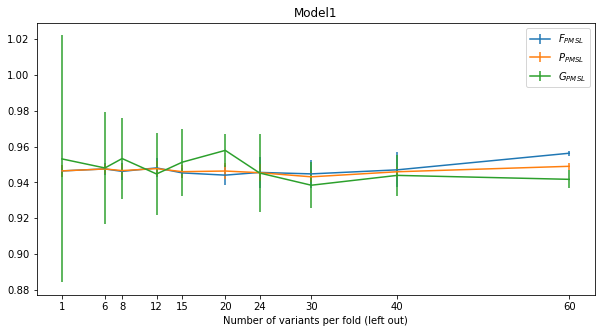

In [12]:
get_folds('Model1')

[1.0, 6.4, 8.5, 12.8, 16.0, 21.3, 25.6, 32.0, 42.7, 64.0]
[0.944689819079586, 0.9451463569643692, 0.9439082666458931, 0.9419923398731305, 0.9423692157230759, 0.9436173438222001, 0.9426773717550658, 0.9449131870282603, 0.9442648526448139, 0.9999999999999998]
[0.9446441650390626, 0.9450898437500002, 0.9442187500000003, 0.9427500000000002, 0.9441503906250001, 0.9457031250000002, 0.94278125, 0.9457421875, 0.9454687500000002, 0.5]
[0.9442237338541974, 0.9444638292486143, 0.9479793765014253, 0.9497847715808632, 0.9568648508310287, 0.9564100544752899, 0.9429374642690235, 0.9483165955119341, 0.9478584372405794, 0.0]


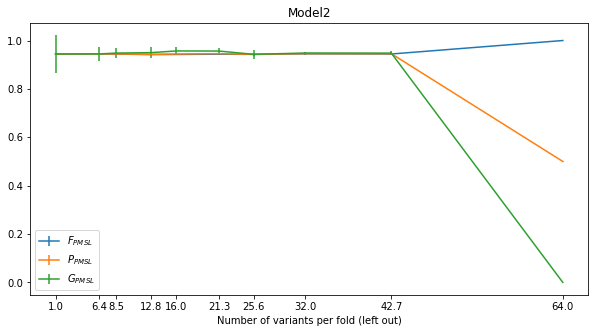

In [13]:
get_folds('Model2')

[1.0, 6.4, 8.5, 12.8, 16.0, 21.3, 25.6, 32.0, 42.7, 64.0]
[0.49968168030257065, 0.4986793877048383, 0.5011880583150421, 0.5020096578521624, 0.5017898864152229, 0.49897161550454655, 0.5010025775612595, 0.5002132462623212, 0.4982352736312515, 0.9999999999999998]
[0.49968444824218755, 0.49857031249999995, 0.5016875000000001, 0.5019843749999999, 0.500615234375, 0.4999348958333332, 0.5004062499999999, 0.500625, 0.49947916666666686, 0.5]
[0.505962587660857, 0.49692936141413036, 0.5090307094044323, 0.5024579842167054, 0.4928481258982038, 0.5051940273434535, 0.49819008363761447, 0.502029560103247, 0.5019280794844304, 0.0]


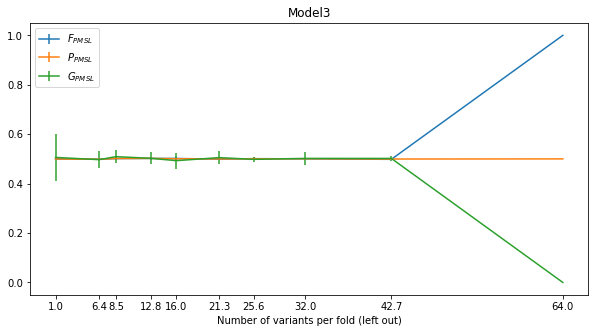

In [14]:
get_folds('Model3')

[1.0, 3.2, 4.3, 6.4, 8.0, 10.7, 12.8, 16.0, 21.3, 32.0]
[0.4228484219058892, 0.42091916709340105, 0.42105840989735305, 0.42042852766935035, 0.4240753711576535, 0.4231553558211916, 0.4241258448219748, 0.6415295684835173, 0.48828728582084974, 0.9073373658518292]
[0.4228515625, 0.4213828125000001, 0.42143749999999996, 0.4210312500000001, 0.42388671875, 0.42411458333333335, 0.42353125, 0.470703125, 0.4208333333333332, 0.453671875]
[0.42465499146253033, 0.4344906910023199, 0.431178393598014, 0.42054294598183384, 0.422801869762658, 0.4269306787819855, 0.4218268419419413, 0.0, 0.2540795824829207, 0.0]


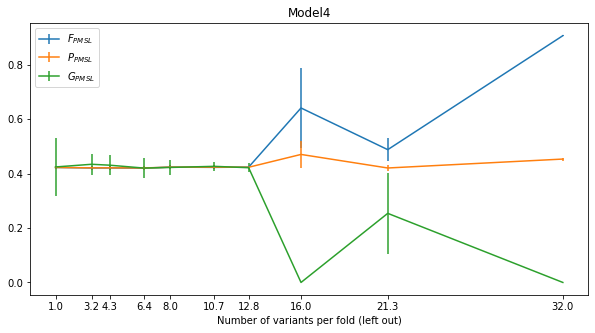

In [15]:
get_folds('Model4')

[1.0, 6.3, 8.4, 12.6, 15.8, 21.0, 25.2, 31.5, 42.0, 63.0]
[0.9255729096059528, 0.7607583841786523, 0.7327852958182014, 0.5956454001316744, 0.6426677772044647, 0.575877079495441, 0.5048276753878412, 0.5802593098563044, 0.2829947375668178, 0.5000000000000001]
[0.9252299067775256, 0.7565039682539682, 0.7261058201058201, 0.5814444444444444, 0.6206349206349205, 0.544153439153439, 0.46322222222222215, 0.5137103174603175, 0.20338624338624334, 0.25011904761904763]
[0.9047124125377541, 0.7214152110566834, 0.6661691872884509, 0.5035670671465883, 0.5125005376867725, 0.4248692124812548, 0.3410106124682025, 0.3470740044999151, 0.0735430188221239, 0.04190309908336971]


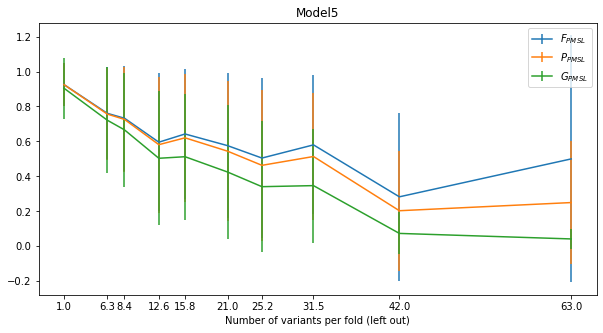

In [16]:
get_folds('Model5')

[1.0, 1.4, 1.8, 2.7, 3.4, 4.5, 5.4, 6.8, 9.0, 13.5]
[0.8746644076098858, 0.8723089016998331, 0.8792423265529996, 0.8759867485121688, 0.864434050533561, 0.8679654667582838, 0.8700819051802078, 0.8618950225801739, 0.8393042555895613, 0.8377643804500443]
[0.8768724279835385, 0.8749074074074068, 0.8820987654320983, 0.8812962962962958, 0.8724999999999993, 0.8761111111111104, 0.8779999999999996, 0.8820370370370363, 0.8704938271604932, 0.8735185185185181]
[0.9468937941617767, 0.8721610998101182, 0.8931130798291579, 0.8979475486850882, 0.913018838559887, 0.86460563551492, 0.9114775763581907, 0.9336194453446527, 0.9214420670445439, 0.8825191197128142]


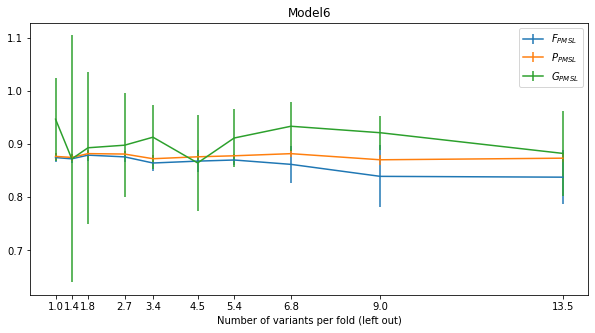

In [17]:
get_folds('Model6')

In [18]:

def get_abs_fitness(occ_each_trvar_sim, occ_each_trvar_tr):
    fit = 0
    for i in range(0, len(occ_each_trvar_sim)):
        if occ_each_trvar_sim[i] > 0:
            fit = fit + 1
    fit = fit/len(occ_each_trvar_sim)
    return fit

def get_abs_precision(occ_each_simvar_sim, occ_each_simvar_trte):
    prec = 0
    for i in range(0, len(occ_each_simvar_trte)):
        if occ_each_simvar_trte[i] > 0:
            prec = prec + 1
    prec = prec/len(occ_each_simvar_trte)
    return prec

def get_abs_generalization(occ_each_tevar_sim, occ_each_tevar_te):
    gen = 0.0
    for i in range(0, len(occ_each_tevar_sim)):
        if occ_each_tevar_sim[i] > 0:
            gen = gen + 1.0
    gen = gen/len(occ_each_tevar_sim)
    return gen

def Abs_LOVOCV(modelname):
    variants = import_log('Variants/CSV/Variants_'+modelname+'.csv')
    traintestlog = import_log('Full_Logs/CSV/Log_'+modelname+'.csv')
    
    overall_counts = get_counts(traintestlog, variants) #list for the count of each variant in original log
    
    fitness_arr = []
    precision_arr = []
    generalization_arr = []
    
    for i_var in range(0, len(variants)):
        train_log = import_log(modelname+'/Training_Logs/Train'+str(i_var)+".csv")
        test_log = import_log(modelname+'/Test_Logs/Test'+str(i_var)+".csv")
        sim_log = import_log("inductive_tree/"+modelname+"/LOVOCV/Inductive_Log"+str(i_var)+".csv")
        
        #needed to calculate metrics
        trvar = get_variants_list(train_log)
        simvar = get_variants_list(sim_log)
        tevar = get_variants_list(test_log) 
        
        occ_each_trvar_sim = get_counts(sim_log, trvar)
        occ_each_tevar_sim = get_counts(sim_log, tevar)
        occ_each_simvar_sim = get_counts(sim_log, simvar)
        
        #get counts for the train log
        occ_each_trvar_tr = get_counts(train_log, trvar)

        #get counts for the test log
        occ_each_tevar_te = get_counts(test_log, tevar)

        #get counts for the train test log
        occ_each_simvar_trte = get_counts(traintestlog, simvar)

        fitness_arr.append(get_abs_fitness(occ_each_trvar_sim, occ_each_trvar_tr))
        precision_arr.append(get_abs_precision(occ_each_simvar_sim, occ_each_simvar_trte))
        generalization_arr.append(get_abs_generalization(occ_each_tevar_sim, occ_each_tevar_te))
    
    generalization_ave, generalization_std = get_average_and_std(generalization_arr)
    precision_ave, precision_std = get_average_and_std(precision_arr)
    fitness_ave, fitness_std = get_average_and_std(fitness_arr)
    
    return fitness_ave, fitness_std, precision_ave, precision_std, generalization_ave, generalization_std

def get_folds_abs(modelname):
    variants = import_log('Variants/CSV/Variants_'+modelname+'.csv')
    traintestlog = import_log('Full_Logs/CSV/Log_'+modelname+'.csv')
    
    folds = [20, 15, 10, 8, 6, 5, 4, 3, 2]
    
    num_variants = len(variants)

    percentages = []
       
    
    fit = []
    fit_err = []
    
    prec = []
    prec_err = []
    
    gen = []
    gen_err = []
    
    percentages.append(1.0)
    
    fit_LOVOCV, fit_LOVOCV_std, prec_LOVOCV, prec_LOVOCV_std, gen_LOVOCV, gen_LOVOCV_std = Abs_LOVOCV(modelname)
    
    fit.append(fit_LOVOCV)
    fit_err.append(fit_LOVOCV_std)
    prec.append(prec_LOVOCV)
    prec_err.append(prec_LOVOCV_std)
    gen.append(gen_LOVOCV)
    gen_err.append(gen_LOVOCV_std)
    
    
    for fold in folds:
        percentages.append(num_variants/fold)
        
        fitness_arr = []
        precision_arr = []
        generalization_arr = []
        
        for i in range(0, fold):
            path = modelname + "/Training_Logs/Fold"+str(fold)+"/"
            path1 = modelname + "/Test_Logs/Fold"+str(fold)+"/"
            path2 = "inductive_tree/"+modelname+"/Fold"+str(fold)+"/"

            train_log = import_log(path + "Train"+str(i)+".csv")
            test_log = import_log(path1 + "Test"+str(i)+".csv")
            sim_log = import_log(path2 +"Inductive_Log"+str(i)+".csv")
        
            #needed to calculate metrics
            trvar = get_variants_list(train_log)
            simvar = get_variants_list(sim_log)
            tevar = get_variants_list(test_log) 

            occ_each_trvar_sim = get_counts(sim_log, trvar)
            occ_each_tevar_sim = get_counts(sim_log, tevar)
            occ_each_simvar_sim = get_counts(sim_log, simvar)

            #get counts for the train log
            occ_each_trvar_tr = get_counts(train_log, trvar)

            #get counts for the test log
            occ_each_tevar_te = get_counts(test_log, tevar)

            #get counts for the train test log
            occ_each_simvar_trte = get_counts(traintestlog, simvar)

            fitness_arr.append(get_abs_fitness(occ_each_trvar_sim, occ_each_trvar_tr))
            precision_arr.append(get_abs_precision(occ_each_simvar_sim, occ_each_simvar_trte))
            generalization_arr.append(get_abs_generalization(occ_each_tevar_sim, occ_each_tevar_te))
    
        generalization_ave, generalization_std = get_average_and_std(generalization_arr)
        precision_ave, precision_std = get_average_and_std(precision_arr)
        fitness_ave, fitness_std = get_average_and_std(fitness_arr)
        
        fit.append(fitness_ave)
        fit_err.append(fitness_std)
        
        prec.append(precision_ave)
        prec_err.append(precision_std)
        
        gen.append(generalization_ave)
        gen_err.append(generalization_std)
    percentages = [ round(elem, 1) for elem in percentages ]   
    print(percentages)
    print(fit)
    print(prec)
    print(gen)

    fig = plt.figure(figsize=(10,5))
    plt.title("Absolute "+ modelname)
    plt.xticks(percentages)
    plt.xlabel("Number of variants per fold (left out)")
    plt.errorbar(percentages, fit, yerr=fit_err, label=r'$F_{A-PMSL}$')
    plt.errorbar(percentages, prec, yerr=prec_err, label=r'$P_{A-PMSL}$')
    plt.errorbar(percentages, gen, yerr=gen_err, label=r'$G_{A-PMSL}$')
    plt.legend()
    plt.savefig("Plots_Tree/Abs_Tree_Ind_"+modelname+".pdf", format="pdf", bbox_inches='tight')

[1.0, 6.0, 8.0, 12.0, 15.0, 20.0, 24.0, 30.0, 40.0, 60.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


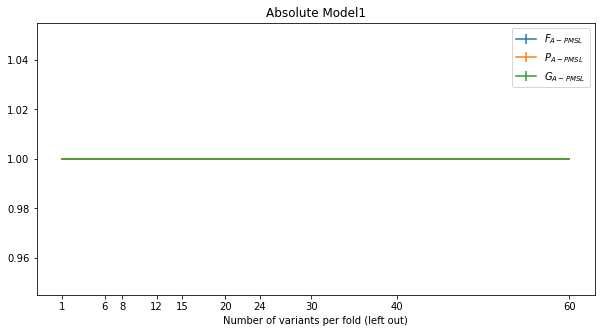

In [19]:
get_folds_abs("Model1")

[1.0, 6.4, 8.5, 12.8, 16.0, 21.3, 25.6, 32.0, 42.7, 64.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0]


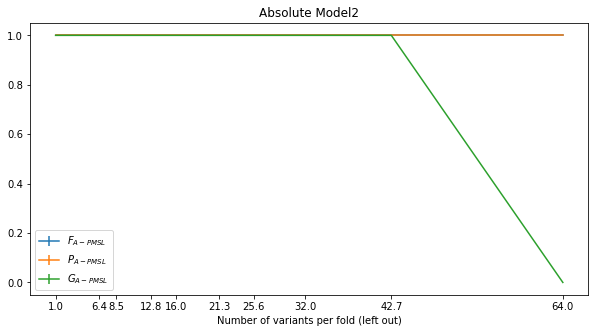

In [20]:
get_folds_abs("Model2")

[1.0, 6.4, 8.5, 12.8, 16.0, 21.3, 25.6, 32.0, 42.7, 64.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0]


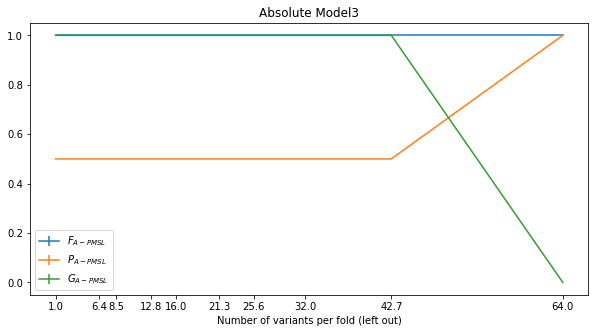

In [21]:
get_folds_abs("Model3")

[1.0, 3.2, 4.3, 6.4, 8.0, 10.7, 12.8, 16.0, 21.3, 32.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.5120000000000003, 0.5120000000000002, 0.5120000000000002, 0.5120000000000001, 0.512, 0.512, 0.512, 0.56, 0.49066666666666664, 0.64]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.5036075036075036, 0.0]


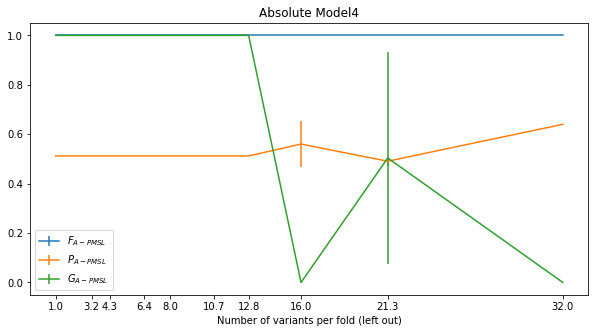

In [22]:
get_folds_abs("Model4")

[1.0, 6.3, 8.4, 12.6, 15.8, 21.0, 25.2, 31.5, 42.0, 63.0]
[0.9925079365079365, 0.9025000000000001, 0.903954802259887, 0.8034854836205557, 0.8704545454545455, 0.8285714285714286, 0.7168316831683168, 0.75, 0.5119047619047619, 0.5]
[0.9719592773540049, 0.8611100350337523, 0.8167733146287917, 0.6312025609340781, 0.6642545069904342, 0.5525868590745954, 0.44936825279183223, 0.3609209938997173, 0.08278164924506388, 0.5]
[0.9920634920634921, 0.9, 0.9166666666666666, 0.7923076923076924, 0.8671875, 0.8333333333333334, 0.712, 0.75, 0.5079365079365079, 0.05555555555555555]


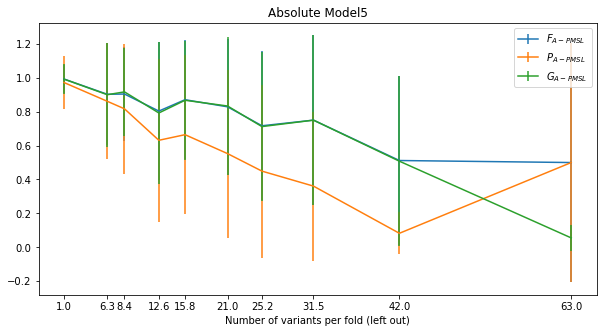

In [23]:
get_folds_abs("Model5")

[1.0, 1.4, 1.8, 2.7, 3.4, 4.5, 5.4, 6.8, 9.0, 13.5]
[0.7433862433862432, 0.7362189564821142, 0.7491941976152503, 0.7359610783952888, 0.738157864176886, 0.7271586698560105, 0.7247312337201042, 0.7551948828311812, 0.721122112211221, 0.7341819207301441]
[0.6968569847120994, 0.6870260872161034, 0.7092657636649038, 0.7062184702142923, 0.7027118788259226, 0.6858629819511846, 0.6833062175392581, 0.7002563343042001, 0.674418901660281, 0.7062524811433109]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


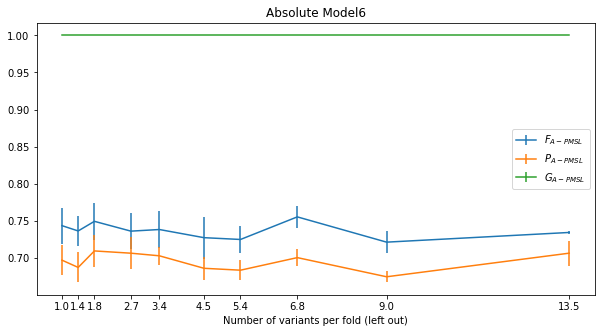

In [24]:
get_folds_abs("Model6")